Modelo y datos de prueba cargados correctamente.

--- Reporte de Clasificación ---
                precision    recall  f1-score   support

No Crítico (0)       0.88      0.78      0.82        72
   Crítico (1)       0.80      0.89      0.84        72

      accuracy                           0.83       144
     macro avg       0.84      0.83      0.83       144
  weighted avg       0.84      0.83      0.83       144


--- Matriz de Confusión ---


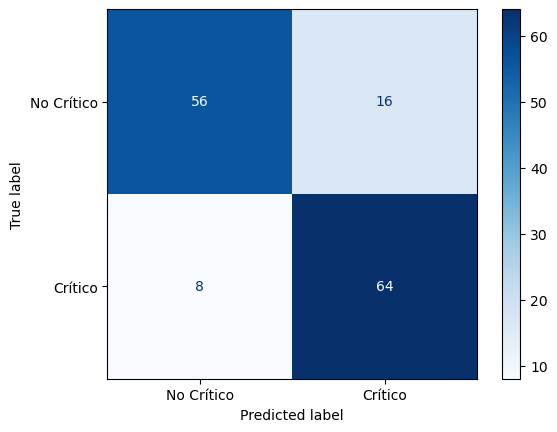


🔍 ANÁLISIS DE ERRORES: INFORMES CRÍTICOS MAL CLASIFICADOS

Se encontraron 8 Falsos Negativos:

--- Falso Negativo #1 ---
Texto del informe (limpio):

bloque datos paciente anonimizado fecha examen fechaanonimizada rx torax portatil hiperinsuflacion pulmonar moderado neumotorax izquierdo instalado cateter venoso quimioterapia izquierdo extremo distal vena cava superior banda atelectasica subsegmentario lobulo inferior derecho reconocen areas consolidacion hilios pulmonares morfologia normal leve ateromatosis elongacion aortica evidencias derrame pleural corazon levemente aumentado tamano bloque firma datos medico anonimizado

------------------------------

--- Falso Negativo #2 ---
Texto del informe (limpio):

bloque datos paciente anonimizado fecha examen fechaanonimizada ecotomografia abdomen higado forma tamano normal alteracion ecogenicidad forma difusa relacion esteatosis grado i via biliar intrahepatica dilatada observan imagenes agregadas colecistectomizado coledoco 64 mm dilat

In [1]:
import joblib
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# --- 1. CARGAR MODELO Y DATOS DE PRUEBA ---

try:
    # Carga el modelo entrenado
    pipeline_modelo = joblib.load('pipeline_naive_bayes.pkl') 
    # Carga los datos de prueba (textos y etiquetas verdaderas)
    X_test, y_test = joblib.load('datos_de_prueba.pkl')
except FileNotFoundError:
    print("Error: No se encontraron los archivos del modelo o de los datos de prueba.")
    print("Asegúrate de haber ejecutado primero el script de la Fase 3 y que los archivos .pkl estén en la misma carpeta.")
    exit()

print("Modelo y datos de prueba cargados correctamente.")

# --- 2. REALIZAR PREDICCIONES EN LOS DATOS DE PRUEBA ---
# El modelo ve los textos de prueba y genera sus propias predicciones
y_pred = pipeline_modelo.predict(X_test)

# --- 3. MOSTRAR REPORTE DE CLASIFICACIÓN Y MATRIZ DE CONFUSIÓN ---

print("\n--- Reporte de Clasificación ---")
print(classification_report(y_test, y_pred, target_names=['No Crítico (0)', 'Crítico (1)']))

print("\n--- Matriz de Confusión ---")
# 'normalize=None' muestra los números absolutos (conteos de informes)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['No Crítico', 'Crítico'], cmap='Blues', normalize=None)
plt.show()


# --- 4. ANÁLISIS DE ERRORES: MOSTRAR FALSOS NEGATIVOS  ---

print("\n" + "="*50)
print("🔍 ANÁLISIS DE ERRORES: INFORMES CRÍTICOS MAL CLASIFICADOS")
print("="*50 + "\n")

# 1. Crear una "máscara" booleana que es True solo para los Falsos Negativos
#    (La etiqueta real es 1 Y la predicción fue 0)
mascara_fn = (y_test == 1) & (y_pred == 0)

# 2. Usar la máscara para filtrar X_test y obtener solo los textos de los errores
informes_fn = X_test[mascara_fn]

if informes_fn.empty:
    print("✅ ¡Excelente! No se encontraron Falsos Negativos en el conjunto de prueba.")
else:
    print(f"Se encontraron {len(informes_fn)} Falsos Negativos:\n")
    # 3. Recorrer e imprimir solo los informes que cumplieron la condición
    for i, texto in enumerate(informes_fn):
        print(f"--- Falso Negativo #{i+1} ---")
        print(f"Texto del informe (limpio):\n")
        print(texto)
        print("\n" + "-"*30 + "\n")